In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline

#### 4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    * Take a look at the first 10 rows. 
    * Look at the last 5 rows. Do you see a problem?
    * Redo the read_csv() call to correct this issue - **do not** modify the original csv file.

#### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows=6868)
#This prevents bringing in the rows containing footnotes at the bottom of the file
#another way is pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')
#another way is to do nrows = gdp_df.loc[~gdp_df['Value'].isna()].shape[0] if you didn't want to hard code a value
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


#### 6. How many rows and columns does gdp_df have? What are the data types of its columns? 
If any of the columns are not the expected types, figure out why and fix it.

In [3]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


#### Answer
6868 rows, 4 columns  
Country column contains objects (string)   
Year column contains integers   
GDP_Per_Capita contains decimal numbers   

#### 7. Which years are represented in this dataset? 
Take a look at the number of observations per year. What do you notice?

In [4]:
(
    gdp_df['Year']
    .value_counts()
    .sort_index()
)

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

In [5]:
gdp_df.groupby('Year')['Year'].count()

Year
1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

#### Answer 
Overall, there is data from 1990-2019, but not all countries have data for every year, and in general the further back in time we go, the there is a slight decrease in total observations for each year

#### 8. How many countries are represented in this dataset? 
Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [6]:
len(
    gdp_df['Country']
    .value_counts()
)

238

In [7]:
(
    gdp_df['Country']
    .value_counts()
    .loc[lambda x : x < 20]
)

SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

#### Answer
There are 238 countries in the dataset   
Least represented countries:   
SÃ£o TomÃ© and Principe      19   
Afghanistan                  18   
Nauru                        16   
Cayman Islands               13   
Sint Maarten (Dutch part)    10   
Turks and Caicos Islands      9   
Djibouti                      7   
https://datahelpdesk.worldbank.org/knowledgebase/articles/191133-why-are-some-data-not-available   
Some countries do not regularly report data due to conflict, lack of statistical capacity, or other reasons (e.g. Somalia, North Korea, and some Caribbean and Pacific island economies). And some countries do not have data for earlier years simply because they did not exist (e.g. countries of the former Soviet Union, South Sudan, Eritrea, Timor-Leste).

#### 9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [8]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 5 to 6843
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         238 non-null    object 
 1   Year            238 non-null    int64  
 2   GDP_Per_Capita  238 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


#### 10. Use `.describe()` to find the summary statistics for GDP per capita in 2014.

In [9]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


##### Observations
- Mean is higher than the median by a good bit   
- Standard deviation is larger than the mean   
- Max value is 6.5 standard deviations above the mean

#### 11. Create a histogram of GDP Per Capita numbers for 2014 
(You may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

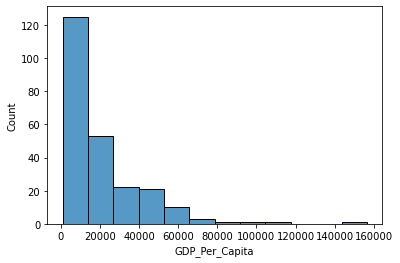

In [10]:
sns.histplot(
    data = gdp_2014, 
    x = "GDP_Per_Capita", 
    bins=12
);

#### Answer
The distribution of the histogram is unimodal and highly skewed to the right

#### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [11]:
gdp_2014.sort_values('GDP_Per_Capita')
#could also use .nlargest and .nsmallest here if you needed to extract the values for anything

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


#### Answer:
5 Highest GDP: Macao SAR (China), Luxembourg, Qatar, Singapore, Bermuda   
5 Lowest GDP: Central African Republic, Burundi, Malawi, Democratic Republic of Congo, Niger

#### 13. Now, return to the full dataset, `gdp_df`. 
Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [12]:
gdp_pivoted = (
    pd.pivot_table(gdp_df
                   .loc[gdp_df['Year']
                        .isin([1990, 2017])],
                   index='Country', 
                   columns='Year')
    .dropna()
)
gdp_pivoted

#adding in values='GDP_Per_Capita' eliminates the multi-index column issue, this goes before the index argument

GDP_Per_Capita              
Year                          1990          2017
Country                                         
Albania                4842.734635  12811.759436
Algeria                8746.352901  11737.409353
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551675  19840.076123
Arab World             9694.667544  14555.474921
...                            ...           ...
Vanuatu                2888.309393   3116.645194
Vietnam                1673.249634   7155.745829
World                  9680.269697  16253.385518
Zambia                 2190.182814   3485.005238
Zimbabwe               3324.348171   3028.245976

[207 rows x 2 columns]

In [13]:
gdp_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (GDP_Per_Capita, 1990)  207 non-null    float64
 1   (GDP_Per_Capita, 2017)  207 non-null    float64
dtypes: float64(2)
memory usage: 4.9+ KB


#### 14. Create a new column in `gdp_pivoted` named `Percent_Change`. 
This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [14]:
gdp_pivoted['Percent_Change'] = (
    100 * (gdp_pivoted[('GDP_Per_Capita', 2017)]
           - gdp_pivoted[('GDP_Per_Capita', 1990)])
    / gdp_pivoted[('GDP_Per_Capita', 1990)]
)
gdp_pivoted

GDP_Per_Capita               Percent_Change
Year                          1990          2017               
Country                                                        
Albania                4842.734635  12811.759436     164.556297
Algeria                8746.352901  11737.409353      34.197756
Angola                 5783.429064   7310.901738      26.411194
Antigua and Barbuda   15459.551675  19840.076123      28.335391
Arab World             9694.667544  14555.474921      50.138980
...                            ...           ...            ...
Vanuatu                2888.309393   3116.645194       7.905517
Vietnam                1673.249634   7155.745829     327.655604
World                  9680.269697  16253.385518      67.902197
Zambia                 2190.182814   3485.005238      59.119377
Zimbabwe               3324.348171   3028.245976      -8.907075

[207 rows x 3 columns]

#### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [15]:
len(gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0])

17

In [16]:
#You can sum True/False statements, it gives you back the sum of True values
(gdp_pivoted['Percent_Change'] < 0).sum()

17

In [17]:
#You can also apply mean() to get the proportion of Trues
(gdp_pivoted['Percent_Change'] < 0).mean()

0.0821256038647343

#### Answer
17 countries experienced a negative percent change in GDP from 1990 to 2017

#### 16. Which country had the highest % change in GDP per capita? 
Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [18]:
(
    gdp_pivoted
    .sort_values('Percent_Change', ascending=False)
    .head(2)
)

GDP_Per_Capita               Percent_Change
Year                        1990          2017               
Country                                                      
Equatorial Guinea    1039.985049  22551.083246    2068.404561
China                1423.896348  14344.421239     907.406281

In [19]:
top_gdp_countries = gdp_pivoted.nlargest(2, 'Percent_Change').index
top_gdp_countries

Index(['Equatorial Guinea', 'China'], dtype='object', name='Country')

In [20]:
egc_gdp = gdp_df.loc[gdp_df['Country']
                     .isin(top_gdp_countries)]
egc_gdp

,Country,Year,GDP_Per_Capita
1162,China,2019,16092.300767
1163,China,2018,15242.985858
1164,China,2017,14344.421239
1165,China,2016,13487.822482
1166,China,2015,12691.821553
1167,China,2014,11917.338496
1168,China,2013,11149.867559
1169,China,2012,10397.561415
1170,China,2011,9686.615290
1171,China,2010,8884.588031


In [21]:
top_gdp_countries[0]

'Equatorial Guinea'

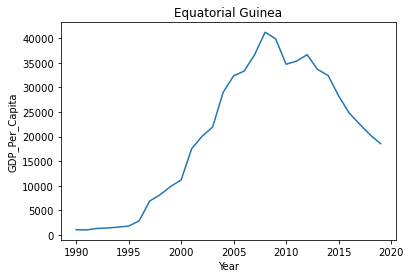

In [22]:
(
    sns.lineplot(data=egc_gdp.loc[egc_gdp['Country'] == top_gdp_countries[0]], 
             x='Year', 
             y='GDP_Per_Capita')
    .set(title=top_gdp_countries[0])
);

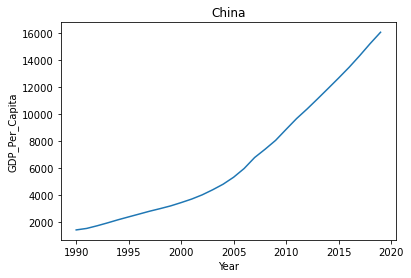

In [23]:
(
    sns.lineplot(data = egc_gdp.loc[egc_gdp['Country'] == top_gdp_countries[1]],
                 x = 'Year',
                 y='GDP_Per_Capita')
    .set(title=top_gdp_countries[1])
);

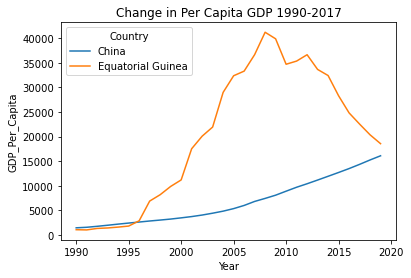

In [24]:
(
    sns.lineplot(data = egc_gdp,
                 x = 'Year', 
                 y='GDP_Per_Capita', 
                 hue='Country')
    .set(title='Change in Per Capita GDP 1990-2017')
);

#### Answer
While the GDP per capita values for each of these countries in 1990 and 2017 are very similar, their paths to arriving at the values are drastically different. China shows a steady, fairly linear increase until around 2004 when the slope of the line gets steeper then remains pretty steady again. Equatorial Guinea shows a linear increas until around 1996 at which point there is tremendous increase until around 2008 when things drop off and overall continue downward through 2019.

#### 17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. 
We will be using this dataframe to add a new column to our dataset.

In [25]:
continents = pd.read_csv('../data/continents.csv')
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  216 non-null    object
 1   Country    216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [26]:
gdp_df = pd.merge(continents, 
                  gdp_df, 
                  how='inner', 
                  on='Country')
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       5443 non-null   object 
 1   Country         5443 non-null   object 
 2   Year            5443 non-null   int64  
 3   GDP_Per_Capita  5443 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [27]:
gdp_df['Country'].value_counts()

Zimbabwe          30
Malaysia          30
Mali              30
Malta             30
Mauritania        30
                  ..
Qatar             20
Afghanistan       18
Nauru             16
Cayman Islands    13
Djibouti           7
Name: Country, Length: 188, dtype: int64

#### 19. Determine the number of countries per continent. Create a bar chart showing this.

In [28]:
(
    gdp_df.groupby(['Continent'])['Country']
    .nunique()
    .to_frame()
    .reset_index()
    .rename(columns = {'Country' : 'Total_Countries'})
)

,Continent,Total_Countries
0,Africa,49
1,Asia,43
2,Europe,45
3,North America,26
4,Oceania,14
5,South America,11


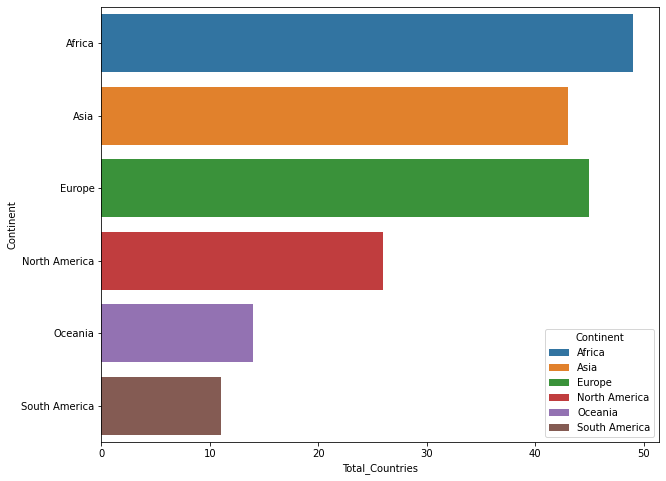

In [29]:
fig, ax = plt.subplots(figsize = (10,8))

sns.barplot(
            data=gdp_df.groupby(['Continent'])['Country']
            .nunique()
            .to_frame()
            .reset_index()
            .rename(columns = {'Country' : 'Total_Countries'}), 
            y='Continent', 
            x='Total_Countries', 
            hue='Continent', 
            dodge=False,
            ax=ax
);

#### 20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

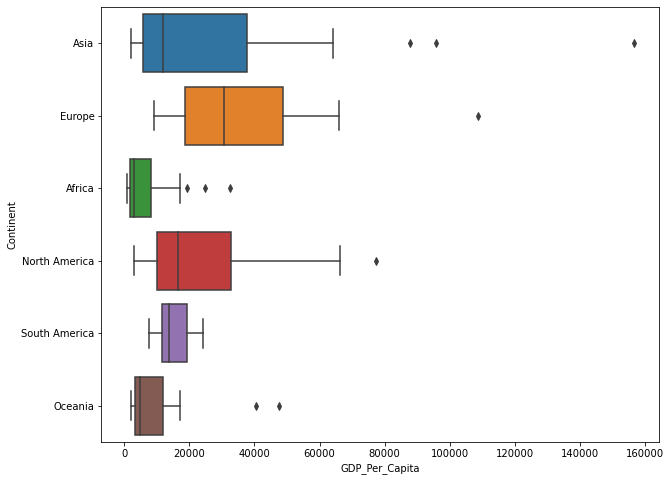

In [30]:
fig, ax = plt.subplots(figsize = (10,8))

sns.boxplot(
            data=gdp_df.loc[gdp_df['Year'] == 2014], 
            x='GDP_Per_Capita', 
            y='Continent', 
            ax=ax
);

#### Answer
All the boxplots are skewed to the right, some extremely so, with the exception of South America. Oceania, South America, and Africa all have much tighter boxplots compared to Asia, Europe, and North America. This isn't terribly surprising for Oceania and South America since they have fewer countries, but Africa has the largest number of countries of all the continents.

#### 21. Download the full csv containing Life expectancy at birth, total (years) from 
[https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`.

In [31]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', header=2)
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            237 non-null    float64
 5   1961            238 non-null    float64
 6   1962            238 non-null    float64
 7   1963            237 non-null    float64
 8   1964            237 non-null    float64
 9   1965            238 non-null    float64
 10  1966            238 non-null    float64
 11  1967            238 non-null    float64
 12  1968            238 non-null    float64
 13  1969            238 non-null    float64
 14  1970            239 non-null    float64
 15  1971            238 non-null    float64
 16  1972            238 non-null    float64
 17  1973            239 non-null    flo

#### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. 
Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [32]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 
                                                  'Indicator Name', 
                                                  'Indicator Code', 
                                                  '2021', 
                                                  'Unnamed: 66'])

In [33]:
#the .melt() method offers options so your result has the column names you designate
life_expectancy = (
                    life_expectancy
                    .melt(id_vars='Country Name',
                         var_name ='Year',
                         value_name = 'Life_Expectancy')
                    .rename(columns = {'Country Name' : 'Country'})
                    .dropna()
)

life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14858 entries, 0 to 16225
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          14858 non-null  object 
 1   Year             14858 non-null  object 
 2   Life_Expectancy  14858 non-null  float64
dtypes: float64(1), object(2)
memory usage: 464.3+ KB


#### 23. What was the first country with a life expectancy to exceed 80?

In [34]:
(
    life_expectancy
    .loc[life_expectancy['Life_Expectancy'] > 80]
    .sort_values('Year')
    .head(1)
)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244


#### Answer
Japan in 1996 was the first country to have a life expectancy over 80

#### 24. Merge `gdp_per_capita` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. 
Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [35]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)
gdp_le = pd.merge(gdp_df, life_expectancy, how='inner', on=['Country', 'Year'])
gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 4921
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        4922 non-null   object 
 1   Country          4922 non-null   object 
 2   Year             4922 non-null   int64  
 3   GDP_Per_Capita   4922 non-null   float64
 4   Life_Expectancy  4922 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 230.7+ KB


#### 25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. 
How many countries have a life expectancy of at least 80 in 2019?

In [36]:
gdp_le_2019 = gdp_le.loc[gdp_le['Year'] == 2019]
gdp_le_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 4892
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        167 non-null    object 
 1   Country          167 non-null    object 
 2   Year             167 non-null    int64  
 3   GDP_Per_Capita   167 non-null    float64
 4   Life_Expectancy  167 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.8+ KB


In [37]:
len(gdp_le_2019.loc[gdp_le_2019['Life_Expectancy'] >= 80])

33

In [38]:
(gdp_le_2019['Life_Expectancy'] >= 80).sum()

33

#### Answer
There were 33 countries with a life expectancy of at least 80 year in 2019

#### 26. Find the countries that had the top 3 largest GDP per capita figures for 2019. 
Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [39]:
top_3_gdp_2019 = gdp_le_2019.nlargest(3, 'GDP_Per_Capita')['Country'].to_list()
top_3_gdp_2019

['Macao SAR, China', 'Luxembourg', 'Singapore']

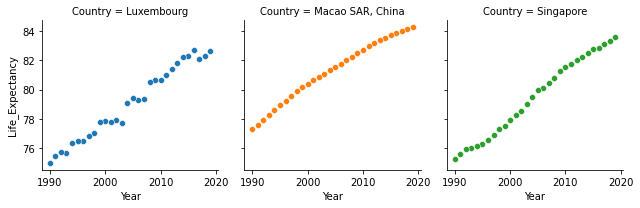

In [40]:
top3 = sns.FacetGrid(data=gdp_le.loc[gdp_le['Country'].isin(top_3_gdp_2019)], 
                     col='Country', 
                     hue='Country')
top3.map(sns.scatterplot, 'Year', 'Life_Expectancy');

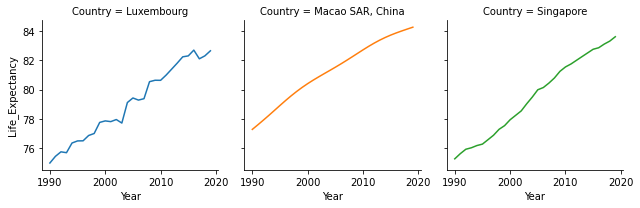

In [41]:
top3 = sns.FacetGrid(data=gdp_le.loc[gdp_le['Country'].isin(top_3_gdp_2019)], 
                     col='Country', 
                     hue='Country')
top3.map(sns.lineplot, 'Year', 'Life_Expectancy');

#### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

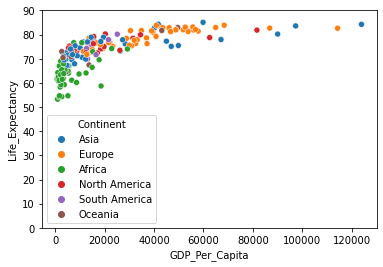

In [42]:
gdp_le_sc = sns.scatterplot(data=gdp_le_2019, 
                            x='GDP_Per_Capita', 
                            y='Life_Expectancy', 
                            hue='Continent')
gdp_le_sc.set(ylim=(0,90));

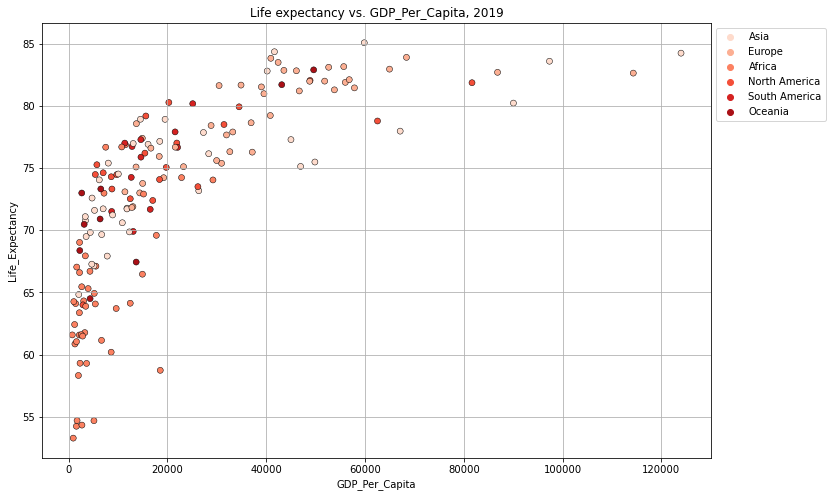

In [43]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = gdp_le_2019, 
                x = 'GDP_Per_Capita', 
                y = 'Life_Expectancy',
                hue = 'Continent', 
                palette = 'Reds', 
                edgecolor = 'black')
plt.title('Life expectancy vs. GDP_Per_Capita, 2019')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));


#### Answer
There appears to be a moderatly strong, non-linear association between life expectancy and gdp per capita such that higher per capita gdp is associated with higher life expectancy. Once above approximately 25,000 for per capita gdp, there is comparatively little increase in little increase in life expectancy, but there is significantly increasing life expectancy as gdp increases up to 25,000 from 0.

#### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. 
What is the meaning of this number?

In [44]:
gdp_le_2019['GDP_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.709018274600647

#### Answer
This is the Pearson Correlation Coefficient which indicates the strength of the linear relationship between life expectancy and GDP per capita. I don't think a linear model is the best for this data, though.   
A value of 0.709 indicates a moderatly strong, positive linear relationship between the variable.

#### 29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. 
Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [45]:
gdp_le_2019['log10_GDP'] = np.log10(gdp_le_2019['GDP_Per_Capita'])
gdp_le_2019.head()

C:\Users\mews2\AppData\Local\Temp\ipykernel_968\800273626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log10_GDP'] = np.log10(gdp_le_2019['GDP_Per_Capita'])


,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy,log10_GDP
0,Asia,Afghanistan,2019,2065.036398,64.833,3.314928
18,Europe,Albania,2019,13724.058790,78.573,4.137483
48,Africa,Algeria,2019,11510.557088,76.880,4.061096
78,Africa,Angola,2019,6670.332297,61.147,3.824147
108,North America,Antigua and Barbuda,2019,21910.184985,77.016,4.340646


In [46]:
gdp_le_2019['log10_GDP'].corr(gdp_le_2019['Life_Expectancy'])

0.8484975848006423

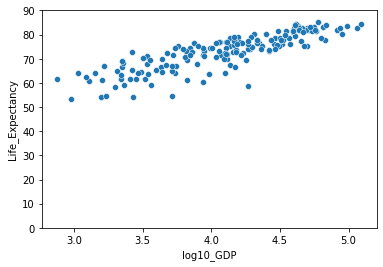

In [47]:
lgdp_le_sc = sns.scatterplot(data=gdp_le_2019, 
                             x='log10_GDP', 
                             y='Life_Expectancy')
lgdp_le_sc.set(ylim=(0,90));

#### Answer
The correlation coefficient is stronger use the log of GDP, and that does make sense when looking at the scatter plot as the curvature in the original scatter plot has been largely straightened out by taking the log of the GDP  values

#### Note on logarithms in a data analysis/science contexts
In the context of applied math such as this, actually is better to default to use the natural log instead of log base 10, and in this context saying "log" actually refers to the natural log, generally speaking

In [48]:
gdp_le_2019['log_GDP'] = np.log(gdp_le_2019['GDP_Per_Capita'])
gdp_le_2019['log_GDP'].corr(gdp_le_2019['Life_Expectancy'])

C:\Users\mews2\AppData\Local\Temp\ipykernel_968\2266778752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log_GDP'] = np.log(gdp_le_2019['GDP_Per_Capita'])


0.8484975848006417

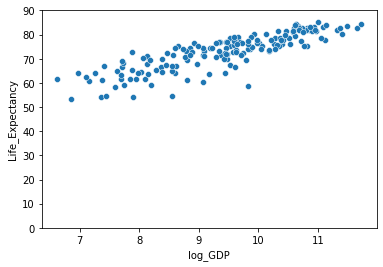

In [49]:
nlgdp_le_sc = sns.scatterplot(data=gdp_le_2019, 
                              x='log_GDP', 
                              y='Life_Expectancy')
nlgdp_le_sc.set(ylim=(0,90));